Dieses Jupyter Notebook wurde von Lisa Tawockli und Ruslan Adilgereev im Rahmen  des Moduls "Maschinelles Lernen" erstellt. Es basiert auf dem Datensatz "wbdc_5.csv", der Merkmale aus Bildern einer Feinnadelbiopsie von Brusttumoren umfasst. Das Hauptziel dieses Projekts ist die Entwicklung eines präzisen Modells zur Klassifizierung von Brusttumoren in zwei Kategorien: gutartig (benign) und bösartig (malignant).

Um dieses Ziel zu erreichen, werden folgende maschinelle Lernalgorithmen angewendet und hinsichtlich ihrer Leistungsfähigkeit bewertet:
Multilayer Perceptron (MLP)
Entscheidungsbaum (Decision Tree)
Support Vector Machine (SVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import name


In [19]:
data = pd.read_csv('wbdc_5.csv')  # load data
data.head()


,ID,Diagnosis,radius1,texture1,perimeter1,area1,compactness1,concavity1,concave_points1,symmetry1,...,fractal_dimension2,radius3,texture3,perimeter3,area3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,897374,B,12.30,19.02,77.88,464.4,0.04202,0.007756,0.008535,0.1539,...,0.002222,13.35,28.46,84.53,544.3,0.09052,0.03619,0.03983,0.2554,0.07207
1,8910251,B,10.60,18.95,69.28,346.4,0.11470,0.063870,0.026420,0.1922,...,0.003318,11.88,22.94,78.28,424.8,0.25150,0.19160,0.07926,0.2940,0.07587
2,854941,B,13.03,18.42,82.61,523.8,0.03766,0.025620,0.029230,0.1467,...,0.001777,13.30,22.81,84.46,545.9,0.04619,0.04833,0.05013,0.1987,0.06169
3,89869,B,14.76,14.74,94.87,668.7,0.07780,0.046080,0.035280,0.1521,...,0.002783,17.27,17.93,114.20,880.8,0.20090,0.21510,0.12510,0.3109,0.08187
4,9113538,M,17.60,23.33,119.00,980.5,0.20040,0.213600,0.100200,0.1696,...,0.011300,21.57,28.87,143.60,1437.0,0.47850,0.51650,0.19960,0.2301,0.12240


In [11]:
data.dropna(axis=0)  # entfernen von Daten mit fehlenden Werten
data.columns  # Spaltennamen der Tabelle (potentielle Features)
print(len(data.columns), data.columns)

29 Index(['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'compactness2', 'concavity2', 'concave_points2', 'symmetry2',
       'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3',
       'compactness3', 'concavity3', 'concave_points3', 'symmetry3',
       'fractal_dimension3'],
      dtype='object')


### Features
Der vorliegende Datensatz beinhaltet 29 Spalten. Davon ist eine Spalte "ID" kein Features und die Spalte "Diagnosis" gilt es vorherzusagen, sodass der Datensatz 27 potentielle Features hat.

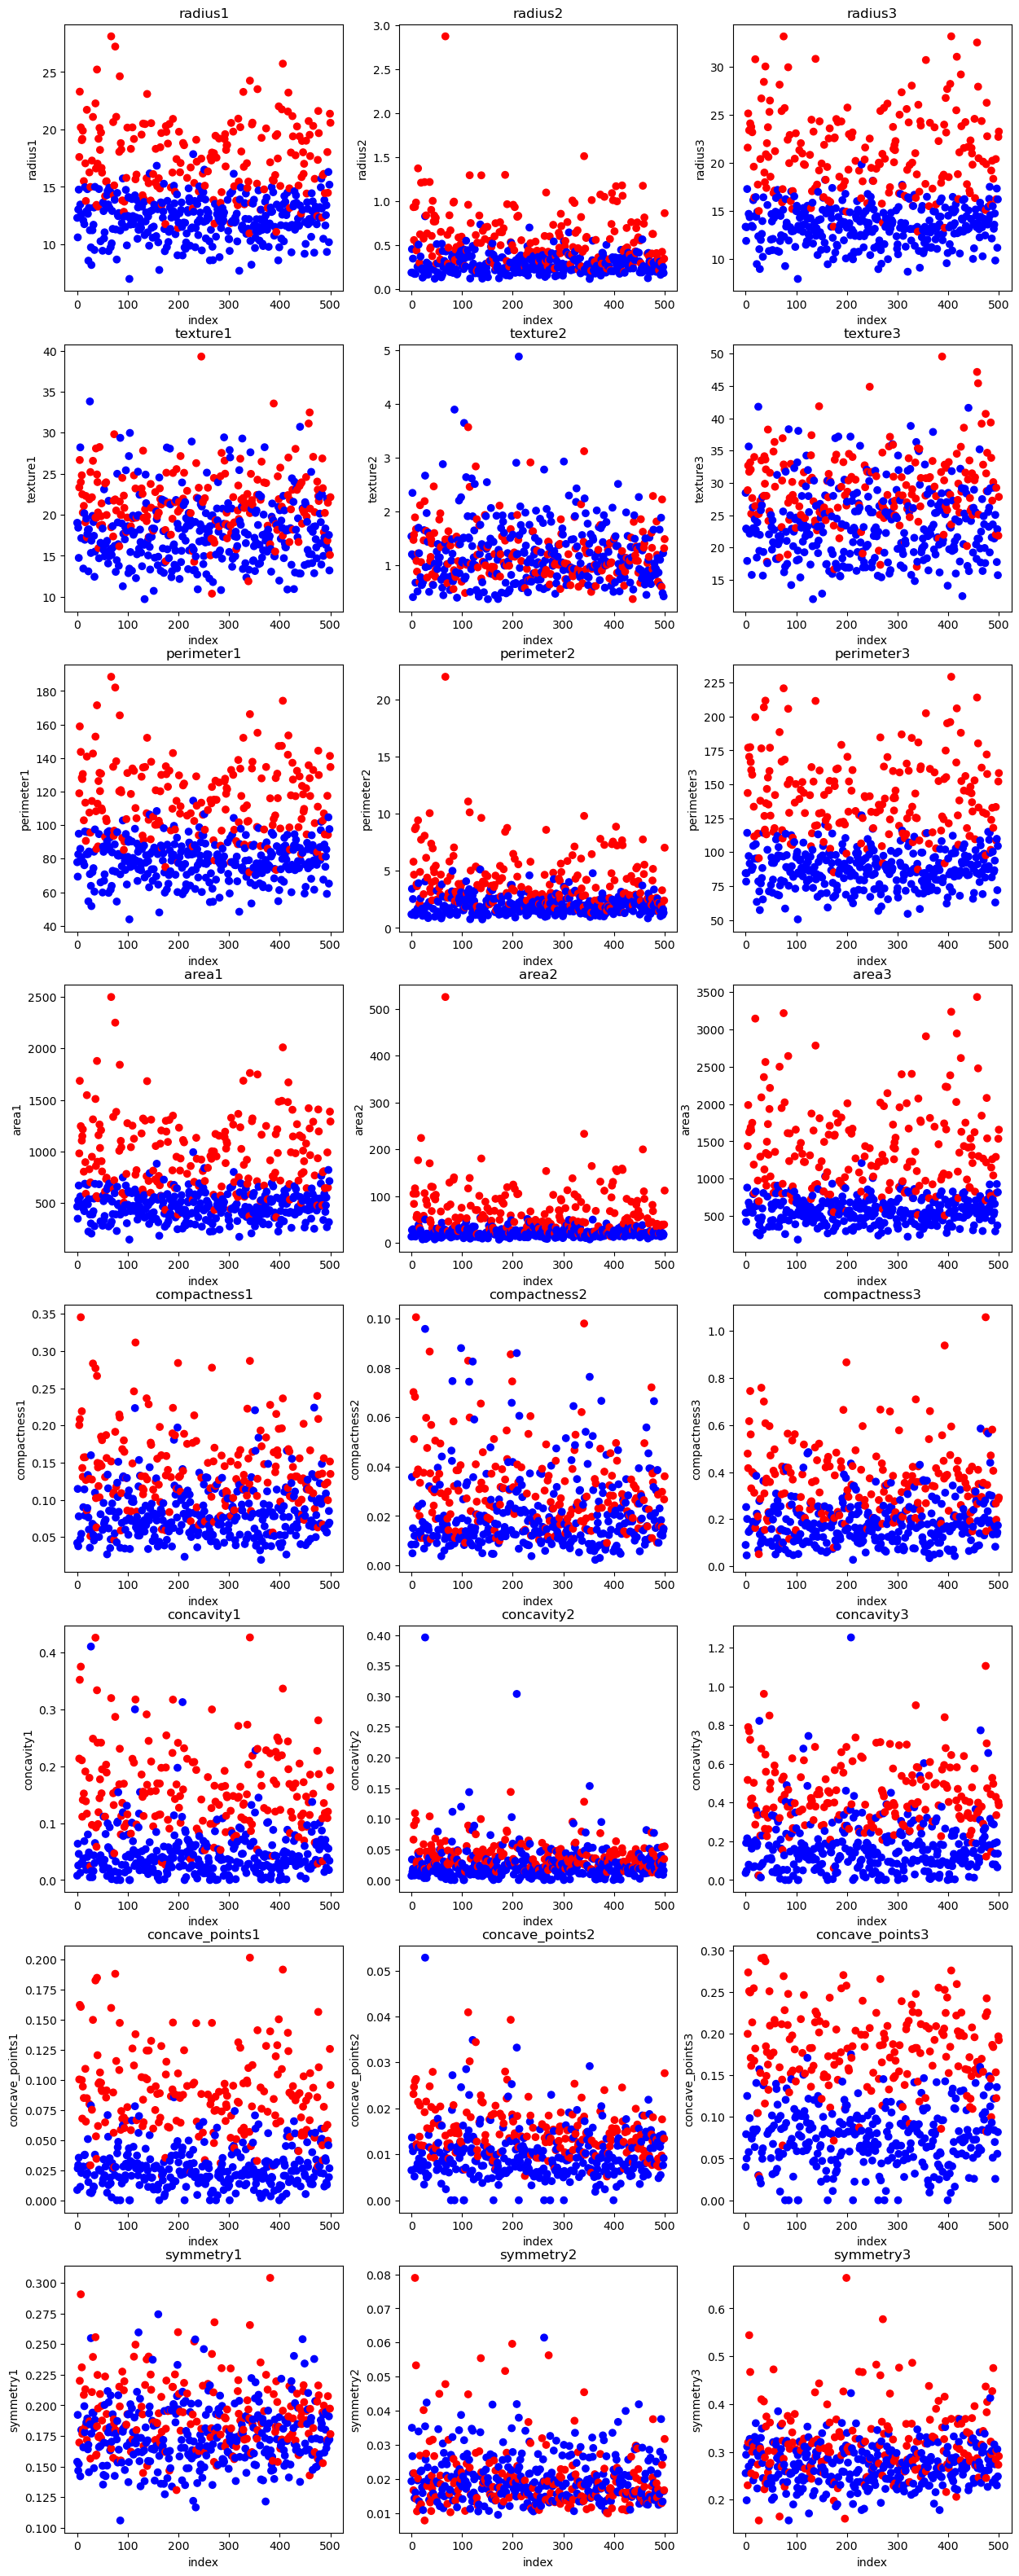

In [35]:
# Aufteilen der Daten in Features und Labels
# Markiere die jeweiligen Datenpunkte als gutartig (blau) oder bösartig (rot)
colors = {'M': 'red', 'B': 'blue'}
fig, axs = plt.subplots(8, 3, figsize=(15, 40))
for i, feature in enumerate(features):
    for j in range(1, 4):
        axs[i, j-1].scatter(data.index, data[feature+str(j)], c=data['Diagnosis'].apply(lambda x: colors[x]))
        axs[i, j-1].set_title(feature+str(j))
        axs[i, j-1].set_xlabel('index')
        axs[i, j-1].set_ylabel(feature+str(j))


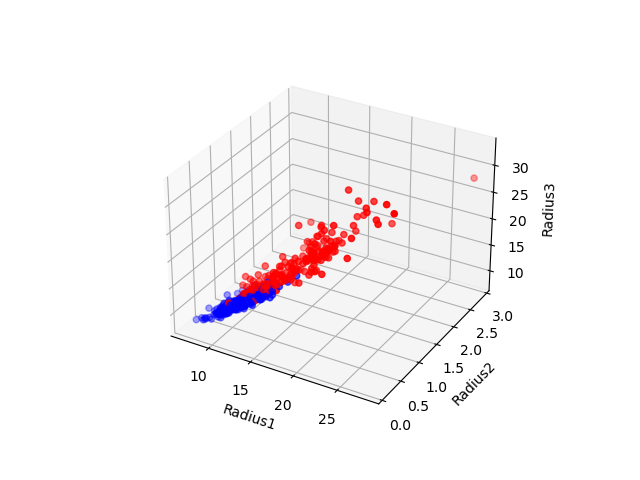

In [71]:
# creating 3d plot using matplotlib 
# in python 

# for creating a responsive plot 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

# Generating random data
x = data["radius1"].to_numpy()
y = data["radius2"].to_numpy()
z = data["radius3"].to_numpy()

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = {'M': 'red', 'B': 'blue'}  # Die gutartigen Datenpunkte sind blau, die bösartigen rot
ax.scatter(x, y, z, c=data['Diagnosis'].apply(lambda x: colors[x]), marker='o')

ax.set_xlabel('Radius1')
ax.set_ylabel('Radius2')
ax.set_zlabel('Radius3')

plt.show()
